# Проектная работа

## Описание проекта
В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

### Описание данных

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

## 1. Общая информация

In [1]:
# импортирую нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# считываю файл, использую разделитель табуляции
data = pd.read_csv('D:/ENOT/LEARNING/JupyterBook/projects/project_theme_3/real_estate_data.csv', sep="\t")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
display(data.head(10)) # первое ознакомление с таблицей

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
#список столбцов, которые хотим привести к целочисленному виду
list_int = ['last_price',
            'floors_total',
            'balcony',
            'airports_nearest',
            'cityCenters_nearest',
            'parks_around3000',
            'parks_nearest',
            'ponds_around3000',
            'ponds_nearest',
            'days_exposition']
#перебираем столбцы в списке, проверяем на наличие NaN и переводим их в int
for item in list_int:
    data[item] = data[data[item].notnull()][item].astype(int)

In [6]:
pd.DataFrame(round((data.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.360000
living_area,8.030000
floor,0.000000
is_apartment,88.290000


Из информации по датасету видно,что есть много пропусков в отдельных категориях данных. В некоторых пропущено больше 50%.

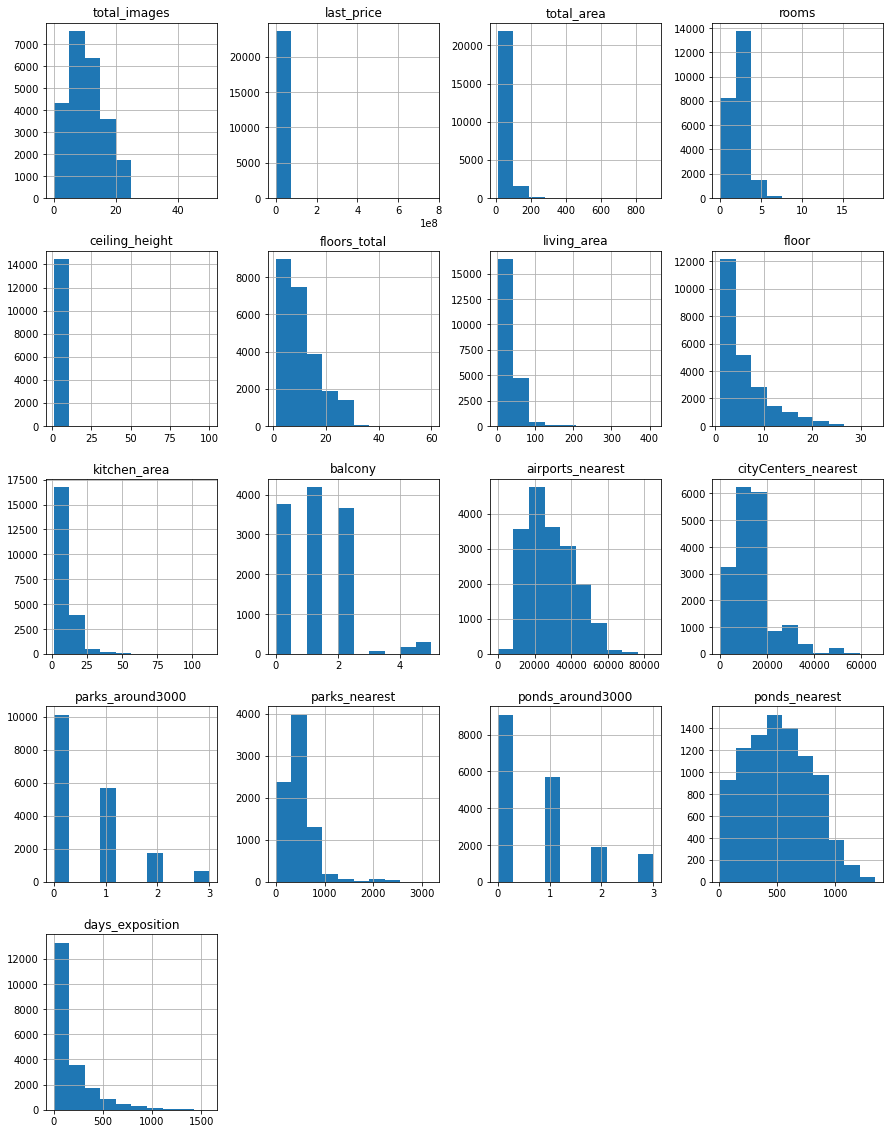

In [7]:
data.hist(figsize=(15, 20));

## 2.Предобработка данных
### 2.1. Пропущенные значения

In [8]:
data.isna().sum() # проверяю количество пропущенных значений в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Сначала пройдусь по простым значениям, которые обработать и объяснить проще всего.**

In [9]:
data['locality_name'] = data['locality_name'].fillna('unknown')
# заменяю пропущенные значения в названии населенного пункта на 'unknown'. С ними уже ничего нельзя сделать.

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False)
# пропущенные значения,скорее всего указывает на то,что это не апартаменты.

In [11]:
data['balcony'] = data['balcony'].fillna(0)
# пропущенные значения, скорее всего указывают на то, что балкона нет.

**Предобработка столбца `kitchen_area`**

In [12]:
data[data['studio'] == True].head(10) # в студиях отдельного помещения для кухни нет,поэтому там пропуск

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,False,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,False,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,False,True,False,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,False,True,False,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,False,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
1173,12,3240000,29.00,2018-10-30T00:00:00,0,NaN,24.0,17.00,2,False,True,False,NaN,2.0,Санкт-Петербург,35129.0,16293.0,0.0,NaN,1.0,475.0,13.0
1174,3,3900000,32.00,2016-10-18T00:00:00,0,2.70,24.0,18.00,2,False,True,False,NaN,2.0,Санкт-Петербург,44754.0,8409.0,1.0,609.0,0.0,NaN,540.0
1220,5,3300000,27.00,2017-11-10T00:00:00,0,2.80,17.0,20.00,16,False,True,False,NaN,0.0,Санкт-Петербург,12507.0,12419.0,0.0,NaN,1.0,528.0,113.0
1260,0,2600000,27.00,2018-07-20T00:00:00,0,2.70,16.0,16.00,4,False,True,False,NaN,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,102.0
1277,10,3150000,26.00,2017-07-14T00:00:00,0,2.75,21.0,17.38,11,False,True,False,NaN,0.0,Санкт-Петербург,48847.0,16685.0,0.0,NaN,0.0,NaN,622.0


In [13]:
data[data['studio'] == True]['kitchen_area'].sum() # ноль кухонь в студиях

0.0

In [14]:
data[data['open_plan'] == True].head(10) # в помещениях с открытой планировкой тоже нет кухни

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.0,1,False,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
508,0,3375000,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.3,19,False,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
780,9,2600000,26.10,2018-02-20T00:00:00,0,NaN,18.0,NaN,8,False,False,True,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000,35.00,2017-04-14T00:00:00,0,2.7,5.0,15.0,3,False,False,True,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000,23.00,2016-09-27T00:00:00,0,NaN,27.0,18.0,7,False,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
1379,3,6000000,44.20,2015-11-10T00:00:00,1,NaN,25.0,17.4,23,False,False,True,NaN,1.0,Санкт-Петербург,10663.0,12738.0,0.0,NaN,0.0,NaN,231.0
1574,0,2200000,22.00,2017-11-03T00:00:00,0,NaN,18.0,15.0,16,False,False,True,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0
1625,7,1980000,23.98,2018-02-01T00:00:00,0,NaN,4.0,10.5,3,False,False,True,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2532,5,3500000,27.10,2018-02-01T00:00:00,0,NaN,18.0,18.7,9,False,False,True,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
3019,18,2100000,24.00,2017-11-10T00:00:00,0,NaN,10.0,18.0,6,False,False,True,NaN,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [15]:
data[data['open_plan'] == True]['kitchen_area'].sum() # здесь тоже нигде не указана площадь для кухни

0.0

In [16]:
data.loc[data['studio'] == True, 'kitchen_area'] = data.loc[data['studio'] == True, 'kitchen_area'].fillna(0)
# заполняю пропущенные значения для студий

In [17]:
data.loc[data['open_plan'] == True, 'kitchen_area'] = data.loc[data['open_plan'] == True, 'kitchen_area'].fillna(0)
# заполняю пропущенные значения для помещений с открытой планировкой

In [18]:
data.corr() # смотрю зависимости параметров квартиры между собой

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,0.010532,-0.029303,-0.024407,0.110151,0.048903,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,0.026958,-0.025362,-0.008802,0.515949,0.008559,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,0.029633,-0.072653,-0.034885,0.610691,0.009941,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,0.000399,-0.147286,-0.087500,0.292718,-0.015519,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.154959,0.001674,0.042777,0.082704,0.031216,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,-0.026351,0.070151,0.050791,0.143829,0.172812,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,0.026969,-0.056231,-0.033711,0.432633,-0.014772,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,-0.013294,0.036940,0.035824,0.122706,0.168567,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
is_apartment,0.010532,0.026958,0.029633,0.000399,0.154959,-0.026351,0.026969,-0.013294,1.000000,-0.003657,-0.002448,0.048979,0.033022,0.016470,0.003732,0.020767,-0.033410,0.023989,0.003357,0.015262
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,-0.003657,1.000000,-0.004235,-0.145984,0.028899,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476


In [19]:
# заполнил возможные пропуски высоты потолков
for floor_unique in data['floors_total'].unique():
    median_floor = data[data['floors_total'] == floor_unique]['ceiling_height'].median()
    data.loc[data['floors_total'] == floor_unique, 'ceiling_height'] \
    = data.loc[data['floors_total'] == floor_unique, 'ceiling_height'].fillna(median_floor)

In [20]:
# заполняю пропуски площади кухни
for room_unique in data['rooms'].unique():
    median_kitchen = data[(data['rooms']== room_unique) & (data['kitchen_area'] != 0)]['kitchen_area'].median()
    median_total =  data[data['rooms']== room_unique]['total_area'].median()
    converse_med_kitchen = median_kitchen / median_total
    data.loc[(data['rooms'] == room_unique) & (data['kitchen_area'].isna()), 'kitchen_area'] \
    = data.loc[(data['rooms']== room_unique) & (data['kitchen_area'].isna()), 'total_area'] * converse_med_kitchen
data['kitchen_area'] = data['kitchen_area'].round(2)

In [21]:
# заполнид пропуски жилой площади
for room_unique in data['rooms'].unique():
    median_living = data[data['rooms']== room_unique]['living_area'].median()
    median_total =  data[data['rooms']== room_unique]['total_area'].median()
    converse_med_living = median_living / median_total
    data.loc[(data['rooms'] == room_unique) & (data['living_area'].isna()), 'living_area'] \
    = data.loc[(data['rooms']== room_unique) & (data['living_area'].isna()), 'total_area'] * converse_med_living

In [22]:
data['living_area'] = data['living_area'].round(2) # округлил до двух цифр после точки

In [23]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04T00:00:00,1,2.75,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20T00:00:00,2,2.55,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24T00:00:00,3,2.60,14.0,98.01,9,False,False,False,20.69,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000,59.00,2018-01-15T00:00:00,3,2.55,5.0,38.00,4,False,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000,56.70,2018-02-11T00:00:00,2,2.80,3.0,29.70,1,False,False,False,9.41,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000,76.75,2017-03-28T00:00:00,2,3.00,17.0,44.17,12,False,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [24]:
data.isna().sum() # пропущенных значений стало немного меньше

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height             78
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Небольшие выводы по пропущенным значениям.

Из общих причин, которые могли привести к пропуску данных могу отнести следующее:
- ошибка в выгрузке данных;
- пропущенные значения определялись пользователем как данные, не являющиеся определяющими при подаче объявления;
- периодически менялась форма подачи объявления;
- пользователи могли указывать некоторые характеристики внутри объявления;
- если какая-то характеристика отсутствовала, либо пользователи не знали ее параметров (например высота потолка, размер жилой площади), просто пропустили соответствующую графу;
- не указана площадь кухни и размер жилой площади, т.к. ориентиром служит просто общая площадь помещения.

Есть группа объектов:
- airports_nearest         5542 
- cityCenters_nearest      5519
- parks_around3000         5518
- ponds_around3000         5518

У них почти одинаковое количество значений. Была проверена и подтверждена гипотеза, что эти объекты находятся в области, парков и прудов может и не быть, если это небольшое поселение центр города указать невозможно, аэропорт далеко и непредставляется каким то важным параметром. Если эти расстояния автоматически дописывает система, возможно для этих населенных пунктов не было еще картографических данных.

В некоторых столбцах `kitchen_area`, `living_area`, `ceiling_height` - можно было бы частично заменить пропущенные значения, усредненными данными, в завсимости от общей площади, количества комнат (`living_area` например хорошо коррелирует с `total_area` (0.939537) в некотором диапазоне площадей), но это наверное сильно бы усрединило нам данные для анализа.
Подобная же ситуация и с пропущенными значениями в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`. В какой-то момент я даже написал функцию, которая заменит в них медианные значения в зависимости от населенного пункта (исключая `unknown`, `Санкт-Петербург`), но поразмыслив убрал эту часть, т.к. задача не заполнить все пропуски.
Строчки с пропущенными значениями в названии населенного пункта,которые я заменил на `unknown`, удалять не стал, т.к. остальные данные, пусть их и немного, вполне корректные и пригодятся для анализа.

### 2.2. Преобразование типов данных

In [25]:
data.info() # смотрим типы данных в столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int32  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23621 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [26]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# изменяем тип данных с object на datetime64[ns]

In [27]:
change_dtype_columns = ['balcony', 'airports_nearest', 'floors_total', 'cityCenters_nearest', 'parks_around3000',\
                        'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
for column in change_dtype_columns:
    try:
        data = data.astype({column: 'Int64'})
    except:
        data[column] = data[column].convert_dtypes('int')
        data = data.astype({column: 'Int64'})
# изменил тип данных в группе столбцов на цельночисленный

In [28]:
data.info() # проверяем результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23621 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

В колонке `first_day_exposition` поменяли тип данных на `datetime` для дальнейшей работы с датой, плюс отбросили пять нулей, которые обозначали время, дата стала более читаемой.
В группе столбцов `change_dtype_columns` изменил тип данных с вещественного на цельночисленный, для удобства восприятия таблицы в целом, отбросив ненужные ноль с точкой, которые возникли из-за пропусков в них.

### 2.3. Устранение дубликатов

In [29]:
data.sort_values('locality_name')['locality_name'].unique()
# изучаю все уникальные значения населённых пунктов, предварительно отсортировав для удобства восприятия

array(['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'город

In [30]:
len(data['locality_name'].unique()) # отмечаю количество уникальных значений, представленных в таблице

365

Изучив данные и немного поискав информацию в сети пришел к выводу, что некоторые типы населенных пунктов можно привести к единому значению, т.к.они могут отличаться из-за неправильной записи пользователями, тип поселения мог меняться в течение времени. Например `деревня Фёдоровское` в 2017 году была преобразована в городской поселок.

In [31]:
def replace_multi_types(multi_types, universal_type):
    for multi_type in multi_types:
        data['locality_name'] = data['locality_name'].str.replace(multi_type, universal_type)

not_uni_types = ['посёлок', 'поселок городского типа', 'городской посёлок', 'деревня', 'городской поселок']
uni_correct_type = 'поселок'
replace_multi_types(not_uni_types, uni_correct_type)
# с помощью функции привожу к единому значению основные типы поселений
# также учитываю, что в некоторых словах использована буква 'ё'

In [32]:
data['locality_name'] = data['locality_name'].str.replace('поселок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].str.replace('поселок Кудрово', 'Кудрово')
# 'поселок Мурино' переименовываю в просто 'Мурино' (тип город, об этом немного ниже)
# 'поселок Кудрово' переименовываю в просто 'Кудрово' (тип город, об этом немного ниже)

In [33]:
len(data['locality_name'].unique()) # проверяю как изменилось количество уникальных поселений

315

**'Мурино' и  'Кудрово'**. В отсортированном списке уникальных значений, можно заметить в начале группу населенных пунктов без указания их типа. С учетом того, что среди них есть `Санкт-Петербург`, значит так записаны города. Мое внимание привлек город `Мурино`, т.к. я точно видел это название среди поселений другого типа. Я предположил, что некоторые поселения могли быть записаны без указания типа. Прошёлся циклом по списку этих названий:

In [34]:
single_locality_names = ['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург']
# создал список из одиночных названий

In [35]:
unique_names = []
for single in single_locality_names:
    if len(data[data['locality_name'].str.contains(single)]['locality_name'].unique()) >= 2:
        unique_names.append(data[data['locality_name'].str.contains(single)]['locality_name'].unique())
print(*unique_names, sep='\n')
# вывел совпадающие значения

['село Русско-Высоцкое' 'Высоцк']
['Кингисепп' 'поселок Кингисеппский']
['Коммунар' 'поселок Коммунары']
['Луга' 'поселок Усть-Луга']
['Любань' 'поселок Любань']
['Никольское' 'село Никольское']


Обнаружилось несколько совпадений, одно из них было `Мурино` --> `поселок Мурино`, второе `Кудрово` --> `поселок Кудрово` остальные были ложными, либо составляли часть другого населенного пункта, либо было два населенных пункта с одинаковым названием,но разным статусом.
Посмотрев информацию про `поселок Мурино` я обнаружил, что в 2019 ему был присвоен статус города. Из-за этого и возникла разность в присвоении типа населённого пункта, в зависимости от года публикации объявления(это заметно по дате публикации объявления). Решил оставить более современное `Мурино` как город. Подобная же ситуация возникла с `Кудрово`, которому присовили статус города в 2018 году.

### 2.4. Редкие и аномальные значения

In [36]:
data.describe().T # просматриваю общую информацию об аномальных значениях, отклонении от стандарта, медиану и т.п.

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.00,5.000000e+01
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.00,7.630000e+08
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.90,9.000000e+02
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.00,1.900000e+01
ceiling_height,23621.0,2.735933e+00,9.959030e-01,1.0,2.55,2.65,2.75,1.000000e+02
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.00,6.000000e+01
living_area,23699.0,3.463744e+01,2.274844e+01,2.0,18.70,30.00,42.30,4.275500e+02
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.00,3.300000e+01
kitchen_area,23699.0,1.040537e+01,5.864696e+00,0.0,7.00,9.00,11.80,1.221700e+02
balcony,23699.0,5.910798e-01,9.592982e-01,0.0,0.00,0.00,1.00,5.000000e+00


**По этой информации можно сразу отметить несколько моментов:**
- `ceiling_height` высота потолков `0` или `100` - выглядит неправдоподобно;
- `rooms` - не может быть `0` комнат;
- `living_area` - всего `2 кв.м` выглядит странно;
- `kitchen_area` - размер кухни `1,3 кв.м` все-таки маловероятен;
- `airports_nearest` - `0 метров`, `parks_nearest` - `1 метр` -  неплохо конечно,что можно жить прям на территоррии аэропорта или парка

**Высота потолков** - `ceiling_height`

In [37]:
data.sort_values('ceiling_height')['ceiling_height'].unique()
# вывожу все значения высоты потолка, чтобы выявить аномальные значения

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [38]:
# сначала изменяю аномалии на корректные значения
# создаю функцию, которая изменит аномалии
def replace_error_height(height):
    try:
        error_height = [22.6, 24., 25., 26., 27., 27.5, 32.]
        for value in error_height:
            if value == height:
                value = height /10
                return value
        return height
    except:
        pass

In [39]:
# можно так
# ata.loc[data['ceiling_height'] > 24, 'ceiling_height'] /= 10

In [40]:
data['ceiling_height'] = data['ceiling_height'].apply(replace_error_height)
# применяю функцию к столбцу 'ceiling_height'

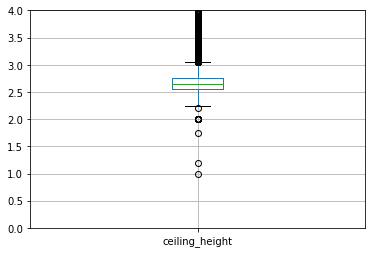

In [41]:
# строю диаграмму размаха, чтобы определить выбросы
plt.ylim(0, 4,2)
data[['ceiling_height']].boxplot();

In [42]:
data = data.query('ceiling_height.isna() or 2.2 <= ceiling_height <= 3.2')
# с помощью диаграммы определяю пределы нормальных значений,так же учитываем пропуски

**Сначала пройдусь по значениям, которые понадобятся в первую очередь для дальнейшего анализа**

**Жилая площадь** - `living_area`. Из таблицы видно, что минимальная жилая площадь `2 кв.м`. Сложно искать искаженные данные, сразу посмотрим границы нормальных значений

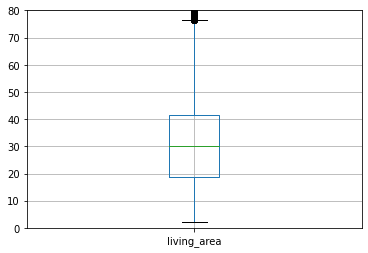

In [43]:
# строю диаграмму размаха, чтобы определить аномальные значнения
plt.ylim(0, 80)
data[['living_area']].boxplot();

Согласно диаграмме, `2 кв.м` в целом близко к области нормальных значений. Тогда прилизительно так и оставим.

In [44]:
data = data.query('living_area.isna() or 3 <= living_area <= 78')
# убираю лишнее, согласно значениям диаграммы

**Площадь кухни** - `kitchen_area`

In [45]:
# смотрим какие значения есть
data.sort_values('kitchen_area')['kitchen_area'].unique()

array([  0. ,   1.3,   2. , ...,  65. ,  93. , 107. ])

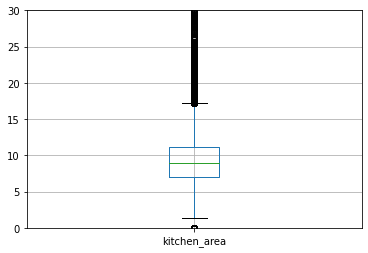

In [46]:
# особо выбивающейся группы значений нет, чтобы произвести замену, поэтому сразу строим диаграмму и определяем аномалии
plt.ylim(0, 30)
data[['kitchen_area']].boxplot();

In [47]:
# удаляем выбивающиеся данные согласно диаграмме
data = data.query('kitchen_area.isna() or 2 <= kitchen_area <= 18 or kitchen_area == 0')

**Общая площадь** - `total_area`

In [48]:
data.sort_values('total_area')['total_area'].head(20)

19904    12.00
19807    13.00
17961    13.00
19558    13.20
19642    14.00
12040    15.00
16949    15.00
8886     15.50
9412     16.00
10208    17.00
716      17.00
22356    17.20
9157     17.60
21802    17.78
20714    18.00
12996    18.00
19311    18.00
6084     18.00
8729     18.40
12881    18.50
Name: total_area, dtype: float64

In [49]:
data.sort_values('total_area')['total_area'].tail(20)

23422    145.00
23684    145.00
97       146.00
936      147.70
4075     149.50
667      149.60
17630    150.00
22750    151.00
8732     151.50
23555    158.50
17692    159.00
22076    159.00
13354    163.33
18701    165.20
22105    165.20
14586    165.20
19183    190.00
21338    190.00
2003     215.00
14991    413.50
Name: total_area, dtype: float64

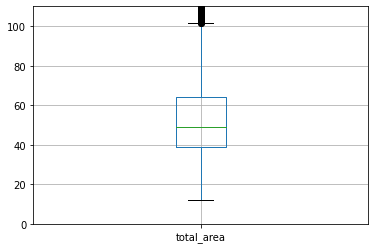

In [50]:
# адекватной замены для выпадающих значений не вижу, перехожу сразу к определению аномалий
plt.ylim(0, 110)
data[['total_area']].boxplot();

In [51]:
# удаляю аномалии согласно диаграмме
# метод .query() я тут не использую, т.к. оказалось он не работает с dtypes: 'Int64'
data = data[(data['total_area'] >= 12) & (data['total_area'] <= 102)]

**Общее количество этажей** - `floors_total`

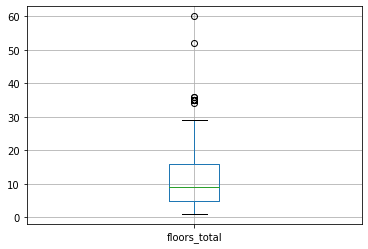

In [52]:
data[['floors_total']].boxplot(); # определяем аномалии

In [53]:
# удаляем аномалии согласно диаграмме
data = data[(data['floors_total'].isna()) | (data['floors_total'] <= 30)]

**Количество комнат** - `rooms`

In [54]:
data['rooms'].unique() # полагаю, что ноль комнат быть не может

array([1, 2, 3, 4, 0, 5, 6, 7], dtype=int64)

In [55]:
data = data[data['rooms'] != 0] # убираем строки с нулем комнат

**Растояние до аэропорта** - `airports_nearest`

In [56]:
# отсортировываем столбец и проверяем первые несколько значений
data.sort_values('airports_nearest')['airports_nearest'].head(10)

21085       0
12899    6450
4017     6450
7778     6914
23150    6949
10059    6989
11294    6989
15633    6989
22283    6989
5062     6989
Name: airports_nearest, dtype: Int64

In [57]:
# ноль метров до аэропорта быть не может, поэтому удаляем эти данные
data = data[(data['airports_nearest'].isna()) | (data['airports_nearest'] != 0)]

**Расстояние до парка** - `parks_nearest`

In [58]:
# смотрим первые несколько значений
data.sort_values('parks_nearest')['parks_nearest'].head(20)

14624     1
11949     3
22941     4
9344      7
2527      9
214      10
19093    10
189      10
21773    10
15296    10
4470     10
7788     10
12018    11
1214     11
19215    11
16831    11
21167    11
14015    12
22791    13
706      13
Name: parks_nearest, dtype: Int64

In [59]:
# видим достаточно маленькое расстояние, но возможно это или нет, сложно сказать
# уберем самые-самые маленькие значения
data = data[(data['parks_nearest'].isna()) | (data['parks_nearest'] >= 10)]

**Последняя цена** - `last_price`

In [60]:
data.sort_values('last_price')['last_price'].head(10) # выводим первые несколько значений

17456    430000
14911    430000
16274    440000
9581     450000
16219    450000
5698     450000
17676    450000
18867    470000
21912    470000
23484    470000
Name: last_price, dtype: int32

Аномально низкая цена, согласно стартовой таблице `data.describe()` ушла вместе с удалением остальных выбросов.

In [61]:
data.info() # фиксируем потери

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20628 entries, 1 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20628 non-null  int64         
 1   last_price            20628 non-null  int32         
 2   total_area            20628 non-null  float64       
 3   first_day_exposition  20628 non-null  datetime64[ns]
 4   rooms                 20628 non-null  int64         
 5   ceiling_height        20563 non-null  float64       
 6   floors_total          20556 non-null  Int64         
 7   living_area           20628 non-null  float64       
 8   floor                 20628 non-null  int64         
 9   is_apartment          20628 non-null  bool          
 10  studio                20628 non-null  bool          
 11  open_plan             20628 non-null  bool          
 12  kitchen_area          20628 non-null  float64       
 13  balcony         

In [62]:
data.describe().T # смотрим, что изменилось после удаления выбросов

,count,mean,std,min,25%,50%,75%,max
total_images,20628.0,9.701716e+00,5.543867e+00,0.0,6.00,9.0,14.00,39.0
last_price,20628.0,4.913430e+06,2.679949e+06,430000.0,3300000.00,4365000.0,5900000.00,53000000.0
total_area,20628.0,5.236795e+01,1.706020e+01,12.0,39.00,49.0,63.00,102.0
rooms,20628.0,1.917394e+00,8.577283e-01,1.0,1.00,2.0,3.00,7.0
ceiling_height,20563.0,2.664236e+00,1.568193e-01,2.2,2.55,2.6,2.75,3.2
floors_total,20556.0,1.077369e+01,6.531250e+00,1.0,5.00,9.0,16.00,29.0
living_area,20628.0,3.007716e+01,1.234201e+01,3.0,18.15,29.0,39.00,77.0
floor,20628.0,5.907262e+00,4.866251e+00,1.0,2.00,4.0,8.00,27.0
kitchen_area,20628.0,9.161313e+00,2.805731e+00,0.0,7.00,8.9,10.80,18.0
balcony,20628.0,5.979736e-01,9.457325e-01,0.0,0.00,0.0,1.00,5.0


После обработки аномалий, и удаления выбивающихся значений я заметил две особенности:
* после удаления редких и аномальных значений, обратил внимание, что медиана по всем значениям, если и изменилась, то совсем незначительно, что показывает еще раз насколько хорошо она отсекает такие значения;
* при удалении аномалий в одной части данных, происходило удаление и в другой части, что видно на примере столбца `last_price`. Наверное это может свидетельствовать о том, что часто искаженные данные могли присутствовать по всем параметрам объекта.

После обработки были удалены около 13% строк

## 3. Добавление столбцов

In [63]:
# добавляем столбец с ценой за один квадратный метр, округляю до двух знаков после запятой
data['price_per_metr'] = round((data['last_price'] / data['total_area']), 2)

In [64]:
# добавляю столбец с днем недели публикации объвления
data['week_day'] = data['first_day_exposition'].dt.weekday

In [65]:
# добавляю столбец с месяцем публикации объявления
data['month_posting'] = data['first_day_exposition'].dt.month

In [66]:
# добавляю столбец с годом публикации объявления
data['year_posting'] = data['first_day_exposition'].dt.year

In [67]:
# добавляю столбец с типом этажа квратиры
def floors_categorize(row):
    floor = row['floor']
    total_floor = row['floors_total']
    try:
        if floor == 1:
            return 'первый'
        if floor == total_floor:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

data['categorize_floors'] = data.apply(floors_categorize, axis=1)

In [68]:
# добавляю столбец с расстоянием до центра города в километрах
data['cityCenters_km'] = data['cityCenters_nearest'] / 1000
data = data.astype({'cityCenters_km': 'Int64'})

## 4. Исследовательский анализ данных

### 4.1. Изучение параметров объектов
Построим гистограммы для ряда характеристи продаваемых квартир

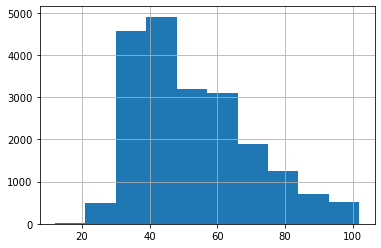

In [69]:
data['total_area'].hist(); # гистограмма общей площади

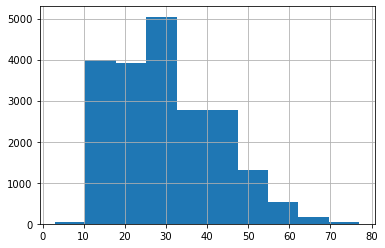

In [70]:
data['living_area'].hist(); # гистограмма жилой площади

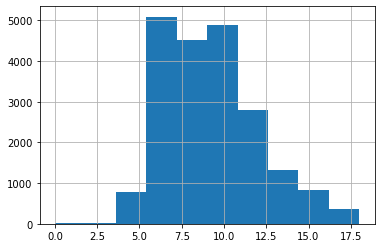

In [71]:
data['kitchen_area'].hist(); # гистограмма для площади кухни

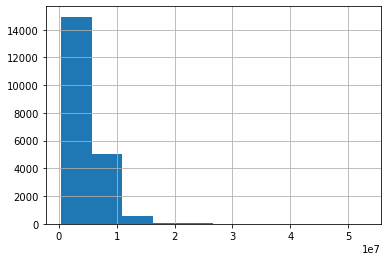

In [72]:
data['last_price'].hist(); # гистограмма цены

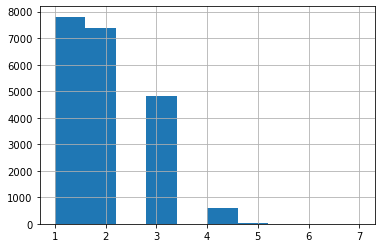

In [73]:
data['rooms'].hist(); # гистограмма количества комнат

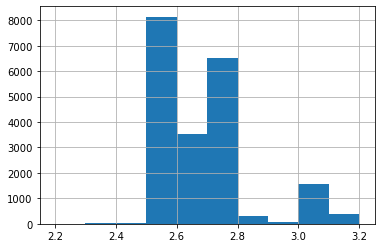

In [74]:
data['ceiling_height'].hist(); # гистограмма высоты потолков

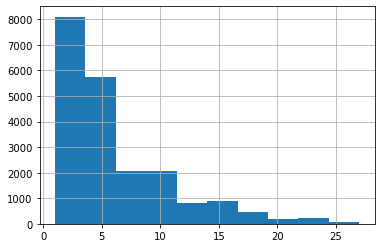

In [75]:
data['floor'].hist(); # гистограмма этажности продаваемых квартир

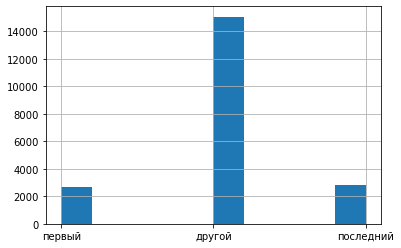

In [76]:
data['categorize_floors'].hist(); # гистограмма типов этажа квартиры

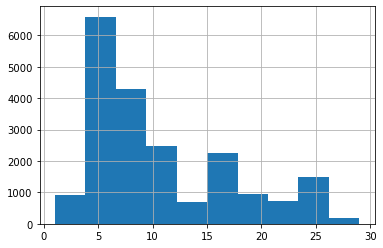

In [77]:
data['floors_total'].hist(); # гистограмма общего количества этажей в доме 

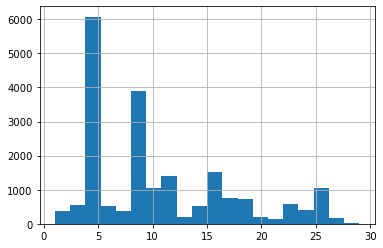

In [78]:
plt.figsize=(20, 10)
data['floors_total'].hist(bins=20);

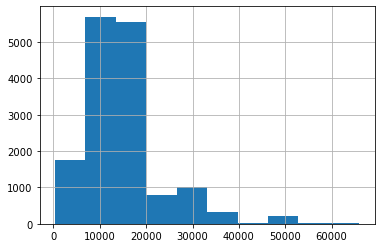

In [79]:
data['cityCenters_nearest'].hist(); # гистограмма расстояния до центра города

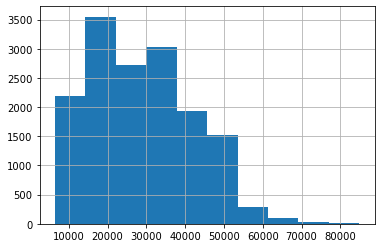

In [80]:
data['airports_nearest'].hist(); # расстояние до ближайшего аэропорта

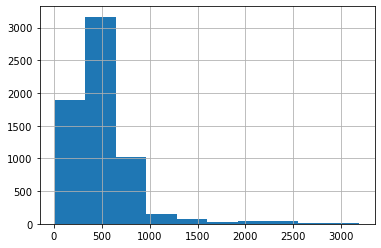

In [81]:
data['parks_nearest'].hist(); # гистограмма расстояния до ближайшего парка

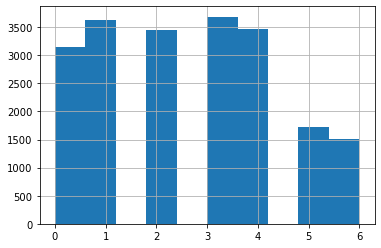

In [82]:
data['week_day'].hist(); # гистограмма публикации объявления по дням недели

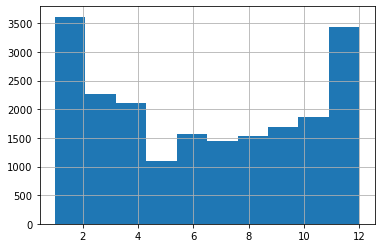

In [83]:
data['month_posting'].hist(); # гистограмма публикации объявления по месяцам

**Небольшие выводы по параметрам объектов:**
* `total_area` - наибольшее число продаваемых объектов 30-50 кв. м, это однушки и двушки. Для рынка недвижимости это является характерной чертой.
* `living_area` - жилая площадь приблизительно соотносится с общей площадью квартиры.
* `kitchen_area` - под кухни в квартирах в основном выеделена небольшая площадь 6-10 кв.м, больше 12.5 кв.м кухни уже редкость.
* `last_price` - большинство квартир можно купить не больше чем за 500 тыс, если есть 1 млн, можно выбирать почти изо всех вариантов.
* `floors_total` - основная масса квартир находится в 4-9-этажных домах.
* `rooms` - большинство квартир в продаже одно- либо 2-х комнатные, что было еще виднопо диаграмме общей площади объектов.
* `ceiling_height` - большинство квартир будет иметь высоту потолков  2.4-2.8 метров.
* `categorize_floors` - выбрать квартиру на первом и последнем этаже будет достаточно сложно, т.к. их на рынке немного.
* `cityCenters_nearest` - большинство квартир будут в пределах 20 тыс. метров от центра города, в основном 7-20 тыс. метров.
* `airports_nearest` - многие квартиры будут в пределах 15-40 тыс метров от ближайшего аэропорта.
* `parks_nearest` - разнообразный выбор квартир, у которых ближайший парк не дальше 500 метров.
* `week_day` - в будние люди работают, в выходные - отдыхают. Так же у нас и с объявлениями, выходной день для отдыха,а не для дел, даже если это всего лишь публикация объявления.
* `month_posting` - какой-то бум желающих продать квартиру в начале года и в конце года. А вот ближе к лету, идет спад количества объявлений, особенно в мае. С осени опять заметен рост числа желающих продать квартиру.

### 4.2. Изучаем скорость продажи квартир

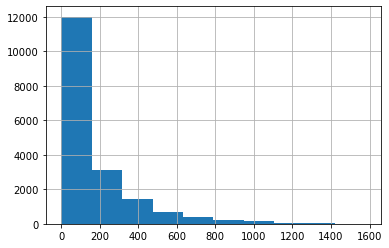

In [85]:
data['days_exposition'].hist(); # строим гистограмму количества дней размещения объявления

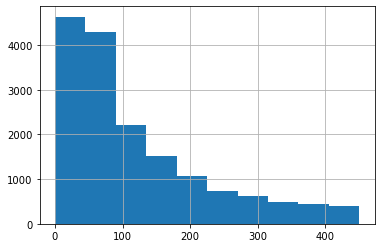

In [86]:
data['days_exposition'].hist(range=(0, 450)); # немного укрупняю диаграмму ,чтобы посмотреть подробнее выбивающееся значение

In [87]:
data['days_exposition'].mean() # высчитываю среднее количество дней для продажи квартиры

171.77523062475834

In [88]:
data['days_exposition'].median() # высчитываю медиану продажи

91.0

`Обычно` продажа квартиры занимает не больше 91 день (см. значение медианы). Если не удалось продать за это время,то скорее всего продажа займет все равно не более 171 дня (см.среднее). Если удалось продать квартиру не больше чем за 44 дня, то можно считать эту продажу `быстрой` (в пределах первой квартили или в 2 раза быстрее медианного значения). Если же продажа будет длиться больше 217 дней, то это уже `долгой` по времени продажей (значения за третьей квартилью,почти в полтора раз выше среднего значения и выше).

### 4.3. Факторы влияющие на общую стоимость объекта

In [89]:
correlation_price_area = data[['total_area', 'living_area', 'kitchen_area', 'rooms', 'last_price']]
# создаю список столбцов в которых будем смотреть зависимость

In [90]:
correlation_price_area.corr() # вычисляем взаимозависимости между данными

,total_area,living_area,kitchen_area,rooms,last_price
total_area,1.000000,0.920764,0.441138,0.798377,0.657626
living_area,0.920764,1.000000,0.168893,0.895570,0.542238
kitchen_area,0.441138,0.168893,1.000000,-0.001872,0.476680
rooms,0.798377,0.895570,-0.001872,1.000000,0.379588
last_price,0.657626,0.542238,0.476680,0.379588,1.000000


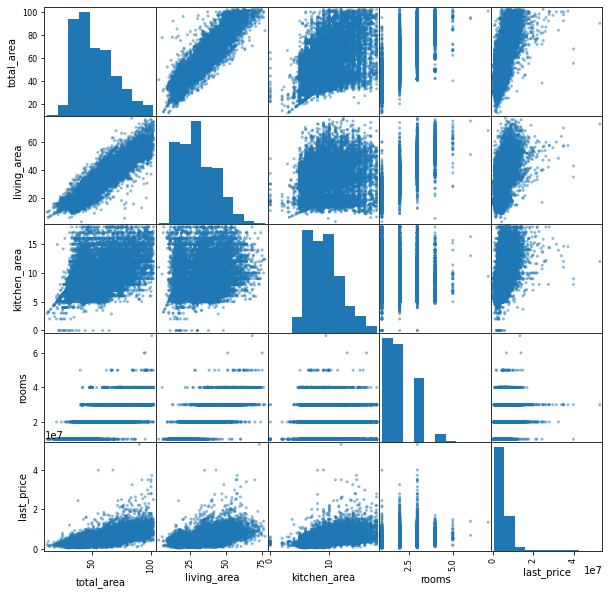

In [91]:
# отображаем зависимости графически
pd.plotting.scatter_matrix(correlation_price_area, figsize=(10, 10));

In [123]:
# сводная таблица зависимости цены от количества комнат
data_price_month = data.pivot_table(index='rooms', values='last_price', aggfunc=['median', 'count'])
data_price_month = data_price_month.reset_index()
data_price_month.columns = ('Комнаты', 'Медиана цены', 'Количество')
data_price_month

,Комнаты,Медиана цены,Количество
0,1,3570000,7808
1,2,4600000,7372
2,3,5700000,4833
3,4,6300000,578
4,5,6300000,34
5,6,10432000,2
6,7,13490000,1


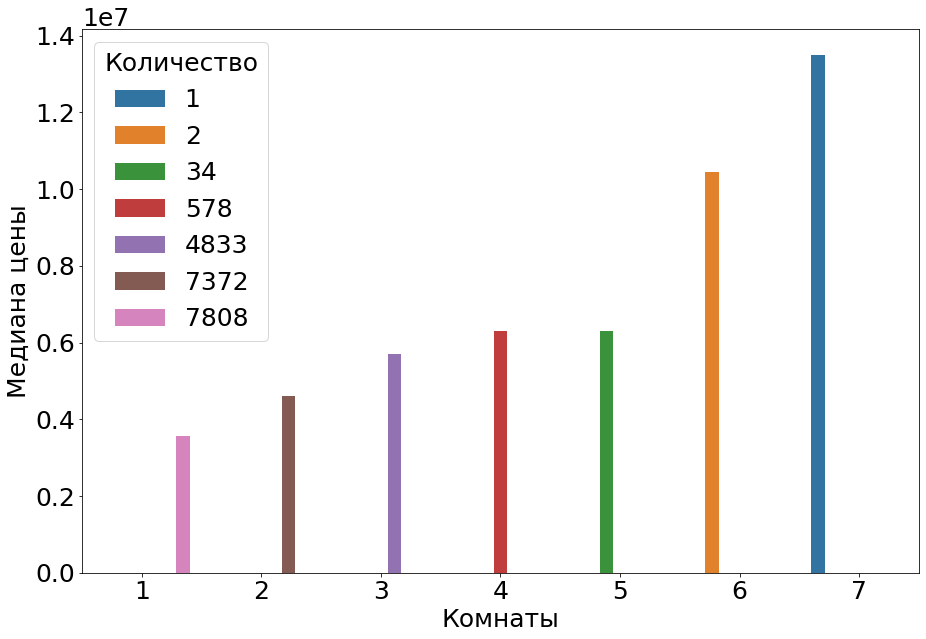

In [130]:
plt.figure(figsize=(15,10))

sns.barplot(y=data_price_month['Медиана цены'], x=data_price_month['Комнаты'], hue=data_price_month['Количество']);

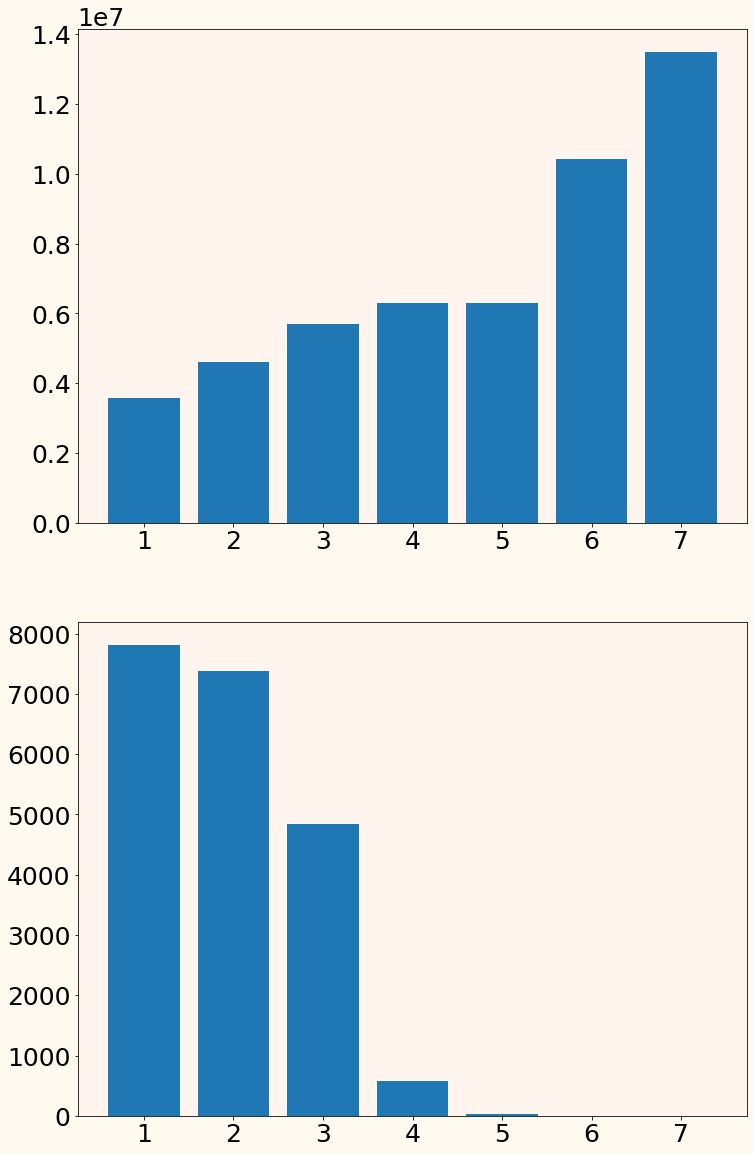

In [132]:
fig, axes = plt.subplots(2, 1)

axes[0].bar(data_price_month['Комнаты'], data_price_month['Медиана цены'])
axes[1].bar(data_price_month['Комнаты'], data_price_month['Количество'])

axes[0].set_facecolor('seashell')
axes[1].set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(20)    #  высота Figure

plt.show()

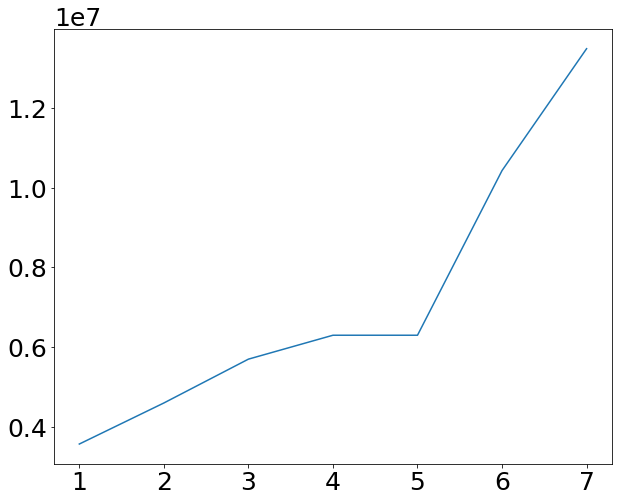

In [148]:
plt.figure(figsize=(10,8))
plt.plot(data_price_month['Комнаты'],data_price_month['Медиана цены']);

In [93]:
# сводная таблица для определения зависимости цены и дня недели размещения объявления 
data.pivot_table(index='week_day', values='last_price', aggfunc=['median', 'count'])

,median,count
,last_price,last_price
week_day,,
0,4350000,3155
1,4400000,3634
2,4400000,3451
3,4350000,3687
4,4300000,3471
5,4350000,1724
6,4350000,1506


In [94]:
# сводная таблица для определения зависимости цены и месяца размещения объявления
data.pivot_table(index='month_posting', values='last_price', aggfunc=['median', 'count'])

,median,count
,last_price,last_price
month_posting,,
1,4380000,1302
2,4350000,2313
3,4400000,2274
4,4522000,2106
5,4300000,1097
6,4200000,1568
7,4300000,1440
8,4350000,1524


In [95]:
# сводная таблица для определения зависимости цены и года размещения объявления
data.pivot_table(index='year_posting', values='last_price', aggfunc=['median', 'count'])

,median,count
,last_price,last_price
year_posting,,
2014,5575000,88
2015,4700000,948
2016,4250000,2415
2017,4250000,7096
2018,4350000,7554
2019,4800000,2527


In [96]:
# сводная таблица для определения зависимости цены и типа этажа квартиры
data.pivot_table(index='categorize_floors', values='last_price', aggfunc=['median', 'count'])

,median,count
,last_price,last_price
categorize_floors,,
другой,4550000,15066
первый,3750000,2661
последний,3990000,2832


**Выводы по зависимостям цены квартиры по отношению к другим параметрам:**
* `total_area` - параметр, от которого самая большая зависимость цены квартиры, это видно и по цифрам и по графику. Достаточно очевидный зависимость, что с ростом общей площади квартиры увеличивается и ее цена.
* `living_area` - немного меньше прослеживается зависимость цены квартиры по отношению к ее жилой площади. С учетом того, что в свою очередь зависимость жилой площади от общей очень высокая, то эта зависимость тоже весьма очевидна. С ростом жилой площади увеличивается и цена.
* `kitchen_area` - завимость цены от площади кухни так же прослеживается, немного меньше,чем зависимость от жилой площади. Так как площадь кухни в свою очередь имеет некоторую зависимость от общей площади, рост площади кухни, зависящий от общей, опосредованно влияет на цену квартиры, но не столь очевидно.
* `rooms` - есть зависимость цены от количества комнат,т.к. с ростом количества комнат почти всегда растет и общая площадь квартиры.
* `week_day` - исходя из таблицы, можно сказать, что цена не зависит от дня недели публикации объявления.
* `month_posting`- прослеживается небольшая зависимость цены от месяца публикации объявления, наибольшая просадка цен в мае-июле. Скорее всего это связано с началом отпусков, и людям не до продаж/покупок квартиры.
* `year_posting` - если не брать в расчет 2014-2015 года, когда количество объявлений было весьма небольшим, то с 2016 года есть тенденция увеличения цены квартиры с каждым годом. Это скорее всего влияние инфляции и роста цен на недвижимость.
* `categorize_floors` - чтож, никто не любит первый и последний этаж, их можно купить дешевле, особенно первый этаж на целых 18%, в сравнении с медианными значениями.

Если кратко подводить итог под всем этим, можно сказать что самые дешевые квартиры можно взять в мае на первом или последнем этаже.
Кроме типа этажность прослеживается прямая зависимость цены от общей площади, которая в свою очередь напрямую влияет на жилую площадь, площадь кухни и количество комнат. Откладывать покупку не стоит, т.к. с каждым годом квартиры дорожают.

### 4.4. Средння цена одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений

In [97]:
# так как я оставлял для расчетов пропуски в названии населенного пункта, то в этих расчетах нужно будет учесть этот момент
# строю сводную таблицу для подсчета средней стоимости одного квадратного метра и количества объявлений
data_non_unknown = data[data['locality_name'] != 'unknown']
mean_table = data_non_unknown.pivot_table(index='locality_name', values='price_per_metr', aggfunc=['mean', 'count'])

In [98]:
mean_table = mean_table.reset_index() # избавляюсь от мультииндекса
mean_table.columns = ['Название населенного пункта','Средння цена кв.м', 'Количество объявлений'] # переименовываю столбцы
mean_table['Средння цена кв.м'] = mean_table['Средння цена кв.м'].astype('int') # отбрасываю числа после точки
mean_table.sort_values('Количество объявлений',ascending=False).head(10)
# вывожу первые 10 населенных пунктов с наибольшим количеством объявлений

,Название населенного пункта,Средння цена кв.м,Количество объявлений
33,Санкт-Петербург,107986,13092
22,Мурино,85678,546
279,поселок Шушары,78409,424
17,Кудрово,95506,417
3,Всеволожск,68457,376
13,Колпино,75457,327
32,Пушкин,100499,321
181,поселок Парголово,90874,312
6,Гатчина,68785,297
4,Выборг,57922,212


In [99]:
mean_table.sort_values('Средння цена кв.м',ascending=False).head()
# населенный пункт с самой высокой стоимостью квадратного метра

,Название населенного пункта,Средння цена кв.м,Количество объявлений
33,Санкт-Петербург,107986,13092
36,Сестрорецк,102818,155
144,поселок Лисий Нос,100660,3
32,Пушкин,100499,321
7,Зеленогорск,100123,20


In [100]:
mean_table.sort_values('Средння цена кв.м',ascending=False).tail()
# населенный пункт с самой низкой стоимостью квадратного метра

,Название населенного пункта,Средння цена кв.м,Количество объявлений
234,поселок Совхозный,12629,2
77,поселок Выскатка,12335,2
69,поселок Вахнова Кара,11688,1
294,поселок станции Свирь,11481,2
240,поселок Старополье,11206,3


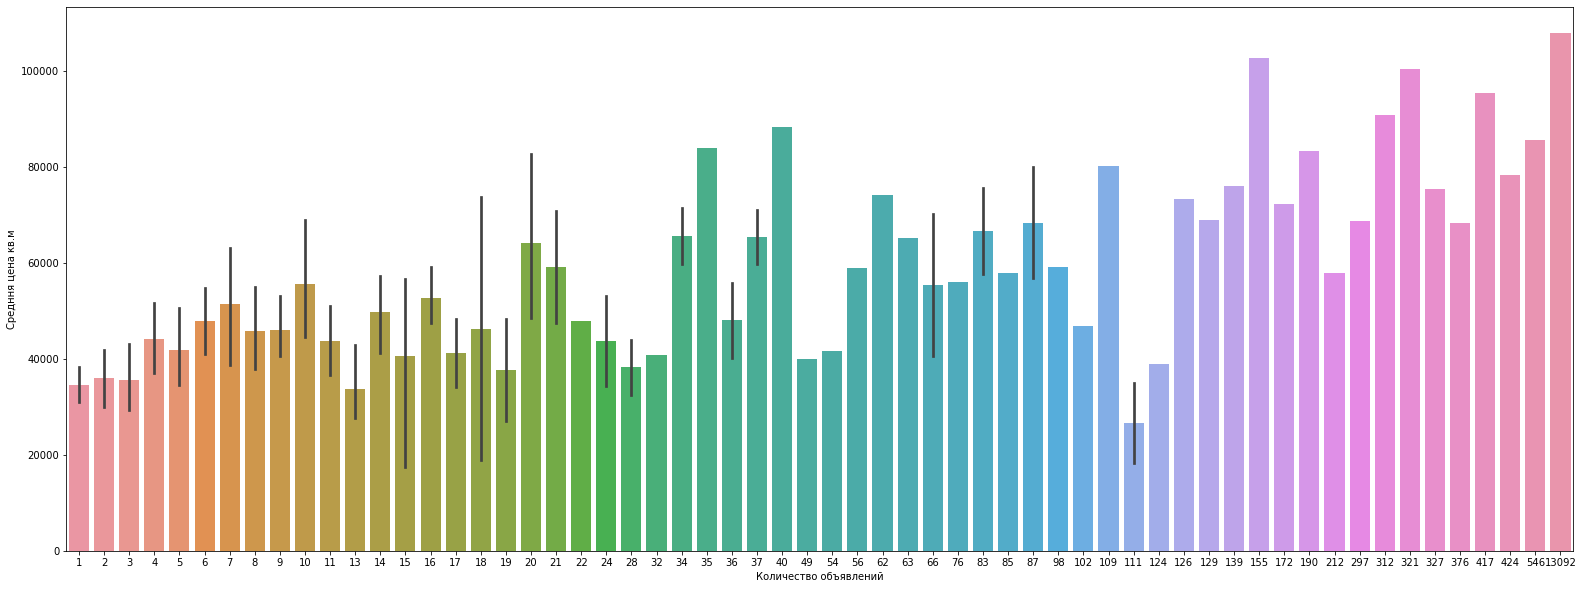

In [101]:
# отображаю зависимость цены за квадратный метр от количества объявлений в виде графика
plt.figure(figsize=(27,10))
sns.barplot(y=mean_table['Средння цена кв.м'], x=mean_table['Количество объявлений'], );

**Несколько выводов по этой части:**
* ожидаемо,что самое большое количество объявлений в городах, либо в пригороде `Санкт-Петербурга`
* `Санкт-Петербург` так же имеет самую высокую стоимость квадратного метра, ожидаемо для областного центра
* `поселок Старополье`имеет самую низкую стоимость за квадратный метр

### 4.5. Средняя стоимость цены каждого километра в Санкт-Петербурге

In [103]:
# выбираем строки только с г. Санкт-Петербург
data_sp = data.query('locality_name == "Санкт-Петербург"')

In [104]:
# смотрим корреляцию
data_sp.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,week_day,month_posting,year_posting,cityCenters_km
total_images,1.000000,0.135150,0.096491,0.068719,0.007818,0.032623,0.084560,0.045308,0.011094,-0.006251,-0.007228,0.043611,0.069067,0.012340,0.020719,0.000460,-0.018348,-0.024662,-0.001370,-0.049568,0.109291,-0.000554,0.004325,0.158657,0.020236
last_price,0.135150,1.000000,0.721940,0.418869,0.386103,0.075077,0.603000,0.063487,0.003659,-0.014569,-0.003912,0.503368,0.084341,-0.009636,-0.343321,0.142315,0.034825,0.198300,-0.081935,0.102588,0.663262,-0.000316,-0.014799,0.020806,-0.342202
total_area,0.096491,0.721940,1.000000,0.785812,0.291767,0.003360,0.920198,-0.008265,-0.001203,-0.023879,-0.003926,0.462907,0.071502,-0.006093,-0.186424,0.076624,0.011542,0.127110,-0.055927,0.122288,0.006495,-0.004208,0.000656,-0.055604,-0.185560
rooms,0.068719,0.418869,0.785812,1.000000,0.036439,-0.241890,0.887950,-0.172803,-0.011840,-0.019165,-0.005024,0.006369,0.002961,-0.044828,-0.130117,0.058581,-0.050016,0.031420,-0.027706,0.068861,-0.218218,-0.001222,-0.002730,-0.024310,-0.130107
ceiling_height,0.007818,0.386103,0.291767,0.036439,1.000000,0.085706,0.187943,0.057586,0.054800,0.009264,0.013051,0.373149,-0.014079,-0.058548,-0.324227,0.138981,-0.047034,0.185750,-0.104330,0.086580,0.292029,-0.006108,-0.012326,-0.050017,-0.323191
floors_total,0.032623,0.075077,0.003360,-0.241890,0.085706,1.000000,-0.165462,0.634886,-0.022233,0.008630,0.009706,0.408056,0.187449,0.093966,0.287561,-0.214566,0.080117,-0.076539,0.017497,-0.015544,0.146854,0.015773,-0.000287,0.005099,0.287956
living_area,0.084560,0.603000,0.920198,0.887950,0.187943,-0.165462,1.000000,-0.118942,-0.009227,-0.013007,0.001032,0.190448,0.027425,-0.036015,-0.197004,0.096664,-0.034543,0.086976,-0.034439,0.096008,-0.091756,-0.003211,-0.006556,-0.039518,-0.196680
floor,0.045308,0.063487,-0.008265,-0.172803,0.057586,0.634886,-0.118942,1.000000,-0.011536,0.010472,0.007259,0.261992,0.172241,0.060274,0.191272,-0.133380,0.066210,-0.040039,0.020279,-0.022809,0.127855,0.014644,0.003621,0.006779,0.191339
is_apartment,0.011094,0.003659,-0.001203,-0.011840,0.054800,-0.022233,-0.009227,-0.011536,1.000000,-0.000765,-0.000662,0.016467,0.036739,0.023123,0.038578,-0.004931,-0.009785,0.005632,0.019865,-0.002658,0.006898,-0.013828,-0.007040,0.019349,0.037316
studio,-0.006251,-0.014569,-0.023879,-0.019165,0.009264,0.008630,-0.013007,0.010472,-0.000765,1.000000,-0.000265,-0.056832,0.025657,0.003660,-0.000655,-0.001494,-0.006846,0.006321,-0.003462,-0.010928,0.005587,-0.012859,-0.007058,-0.023381,-0.000574


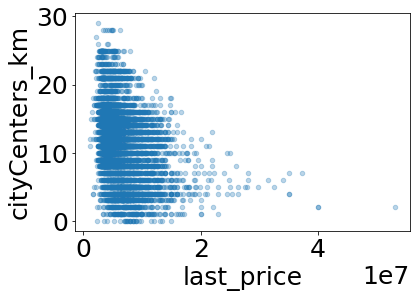

In [105]:
# отображаем корреляцию графически
data_sp.plot(x='last_price', y='cityCenters_km', kind='scatter', alpha=0.3);

In [106]:
# строим сводную таблицу ,чтобы отобразить стоимость цены квартиры за каждый километр
sp_mean_price_per_kilometr = data_sp.pivot_table(index='cityCenters_km', values='last_price', aggfunc='mean')

In [107]:
# отображаю результат
sp_mean_price_per_kilometr.columns = ['Последняя цена']
sp_mean_price_per_kilometr.round(0)

,Последняя цена
cityCenters_km,
0,8340267.0
1,9061510.0
2,8827604.0
3,7554036.0
4,8481621.0
5,8078676.0
6,7762840.0
7,7738725.0
8,6529454.0


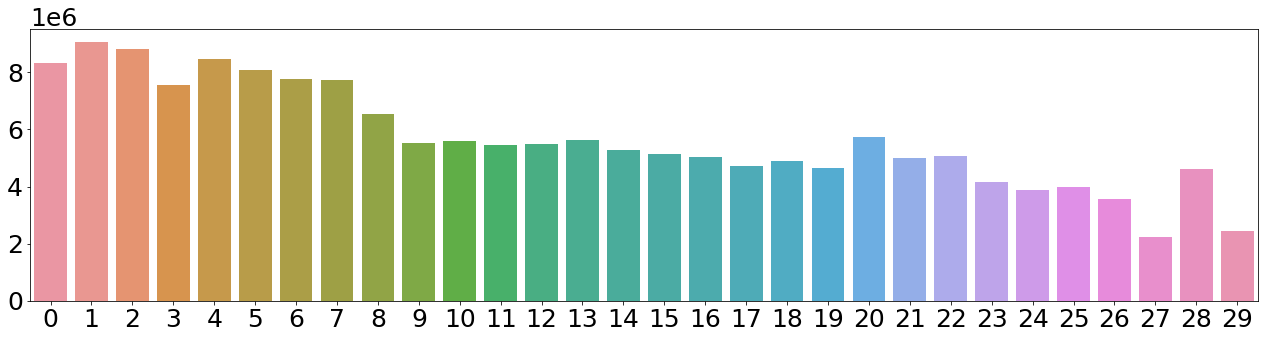

In [108]:
# отображаю зависимость графически
plt.figure(figsize=(22,5))
sns.barplot(x=list(sp_mean_price_per_kilometr.index), y=list(sp_mean_price_per_kilometr['Последняя цена']));

**Выводы.** По сводной таблице мы видим, что при удалении от центра цена меняется в меньшую сторону, это подтверждают цифры корреляции (-0.346078, что значит, при увеличении стоимости квартиры, уменьшается расстояние до центра).Но зависимость не столь явная и очевидная,на графике видно,что изменение стоимости достаточно плавное. Самые дорогие квартиры находится в пределах 8 километров от центра города. Группа со средней сотоимостью находится на расстоянии 9-23 километров от центра, самые дешевые с 24 километра.

## 5. Общий вывод

При первичном ознакомлении с данными, бросилось в глаза большое количество пропущенных данных, но большинство основных параметров было заполнено полностью. Пропущенные значения удалось частично заменить( балконы, площадь кухни и т.д.) остальное оставил как есть, т.к. пропуск могут означать и то, что этих параметров попросту нет. В названии населенных пунктов пропуски заполнил как `unknown`, остальные значения из этих строк можно использовать для анализа. Следующим этапом заменил типы данных в некоторых столбцах, например для корректного отображения даты (`first_day_exposition`) или для улучшения общего восприятия данных (`balcony`, `airports_nearest`  и т.п.). Обратил внимание, что одни и те же населенные пункты имеют разный тип поселения, поэтому привел одинаковые названия к единому. Следующим этапом отбросил все аномалии и сильно выбивающиеся значения, которые сильно отличаются от остальной группы данных. То, что поддавалось логическому объяснению заменил на корректные.

Для дальнейшего анализа добавил ряд необходимых столбцов. С помощью гистограмм исследовал основные параметры продаваемых квартир, где в целом мы получили данные, на которые можно ориентироваться при определении границ значений, находящихся в пределах нормы. Подсчитали скорость продажи квартир, если объявление висит больше 217 дней нужно уже задуматься, о снижении цены или добавить более красочное и подробное описание квартиры. Ожидаемо, что населенные пункты с самым большим количеством объявлений стали в основном города, а самая высокая цена за квадратный метр оказалась в `Санкт-Петербурге`, к тому же в самом городе есть зависимость стоимости квартир по отношению к центру города.

Цель этого исследования была научиться определять рыночную стоимость объектов недвижимости,а также установить параметры, которые позволят отследить аномалии и мошенническую деятельность. Мы установили, что цена зависит во-первых, от локации продаваемого объекта, понятно, что в густонаселенных городах цена будет выше. Следующий параметр, который влияет на цену - это площадь квартиры, чем больше цена, тем выше цена. Понятное дело, что оба эти параметра необходимо рассматривать в совокупности. Для городов, особенно таких как `Санкт-Петербург` выжным определяющим параметром при определении цены будет удаленность от центра города. При ценообразовании стоит учесть еще этаж продаваемой квартиры, первый и последний будут дешевле подобной квартиры на другом этаже. С учетом выше сказанного, а так же при определении ряда других параметров (как например соотношение общей площади и количества комнат или площади кухни) можно легко вычислять объявления, которые сильно будут выбиваться по одному или нескольким параметрам и автоматически блокировать их публикацию. Возможно пользователь ошибся, а значит исправит ошибку, либо если целью были мошеннические действия - предотвратить их. Немного можно сказать по поводу скорости продажи квартиры. Допустим, если объявление висит больше определенного промежутка времени, можно предложить пользователю снизить цену, либо внести данные, которые повысят привлекательность объявления.